# Final project: House Prices Prediction

<i>(last updated: 07/01/2022)</i>

<br>
<b>Participants:</b> &ensp;TRẦN ĐẠI CHÍ - 18127070

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;TRẦN XUÂN LỘC - 18127131

<b>Class:</b> 19KHDL<br>
<b>Teacher Assistant:</b> TRẦN TRUNG KIÊN <br>
---

## Environment

In [1]:
import sys
sys.executable

'C:\\Users\\USER\\anaconda3\\envs\\min_ds-env\\python.exe'

## Import

In [2]:
#!pip install --upgrade mlxtend
#!pip install lightgbm

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

---

## Collecting data

### Introduction

Description: <cite>[1]</cite> "The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset." 
The dataset has 79 explanatory variables 1460 records describing (almost) every aspect of residential homes in Ames, Iowa.

Dataset: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Download data from kaggle

In [5]:
#!pip install xgboost

In [6]:
#!pip install -q kaggle

In [7]:
#!mkdir ~/.kaggle

In [8]:
#!cp kaggle.json ~/.kaggle/

In [9]:
#!chmod 600 ~/.kaggle/kaggle.json

In [10]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques

---

## Explore data

### Load files

In [11]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#print("Train size: ", train_df.shape)
#print("Test size: ", test_df.shape)
df = train_df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### How many rows and columns?

In [12]:
rows, cols = df.shape
print("There are "+str(cols)+" features with "+str(rows)+" records")

There are 81 features with 1460 records


### What does each row mean?

Each row represents the house having some general characteristic to determine its prices in Ames, Iowa.

### Are there any duplicated rows?

We check whether rows are duplicated, then save the result into `have_duplicated_rows`, if there are any rows duplicated the result is True and otherwise it is False.

In [13]:
have_duplicated_rows = df.duplicated().all()

### What does each column mean?

According to [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), the house prices dataset contains 81 features, which short reported as follows:
-  `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
-  `MSSubClass`: The building class
-  `MSZoning`: The general zoning classification
-  `LotFrontage`: Linear feet of street connected to property
-  `LotArea`: Lot size in square feet
-  `Street`: Type of road access
-  `Alley`: Type of alley access
-  `LotShape`: General shape of property
-  `LandContour`: Flatness of the property
-  `Utilities`: Type of utilities available
-  `LotConfig`: Lot configuration
-  `LandSlope`: Slope of property
-  `Neighborhood`: Physical locations within Ames city limits
-  `Condition1`: Proximity to main road or railroad
-  `Condition2`: Proximity to main road or railroad (if a second is present)
-  `BldgType`: Type of dwelling
-  `HouseStyle`: Style of dwelling
-  `OverallQual`: Overall material and finish quality
-  `OverallCond`: Overall condition rating
-  `YearBuilt`: Original construction date
-  `YearRemodAdd`: Remodel date
-  `RoofStyle`: Type of roof
-  `RoofMatl`: Roof material
-  `Exterior1st`: Exterior covering on house
-  `Exterior2nd`: Exterior covering on house (if more than one material)
-  `MasVnrType`: Masonry veneer type
-  `MasVnrArea`: Masonry veneer area in square feet
-  `ExterQual`: Exterior material quality
-  `ExterCond`: Present condition of the material on the exterior
-  `Foundation`: Type of foundation
-  `BsmtQual`: Height of the basement
-  `BsmtCond`: General condition of the basement
-  `BsmtExposure`: Walkout or garden level basement walls
-  `BsmtFinType1`: Quality of basement finished area
-  `BsmtFinSF1`: Type 1 finished square feet
-  `BsmtFinType2`: Quality of second finished area (if present)
-  `BsmtFinSF2`: Type 2 finished square feet
-  `BsmtUnfSF`: Unfinished square feet of basement area
-  `TotalBsmtSF`: Total square feet of basement area
-  `Heating`: Type of heating
-  `HeatingQC`: Heating quality and condition
-  `CentralAir`: Central air conditioning
-  `Electrical`: Electrical system
-  `1stFlrSF`: First Floor square feet
-  `2ndFlrSF`: Second floor square feet
-  `LowQualFinSF`: Low quality finished square feet (all floors)
-  `GrLivArea`: Above grade (ground) living area square feet
-  `BsmtFullBath`: Basement full bathrooms
-  `BsmtHalfBath`: Basement half bathrooms
-  `FullBath`: Full bathrooms above grade
-  `HalfBath`: Half baths above grade
-  `Bedroom`: Number of bedrooms above basement level
-  `Kitchen`: Number of kitchens
-  `KitchenQual`: Kitchen quality
-  `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
-  `Functional`: Home functionality rating
-  `Fireplaces`: Number of fireplaces
-  `FireplaceQu`: Fireplace quality
-  `GarageType`: Garage location
-  `GarageYrBlt`: Year garage was built
-  `GarageFinish`: Interior finish of the garage
-  `GarageCars`: Size of garage in car capacity
-  `GarageArea`: Size of garage in square feet
-  `GarageQual`: Garage quality
-  `GarageCond`: Garage condition
-  `PavedDrive`: Paved driveway
-  `WoodDeckSF`: Wood deck area in square feet
-  `OpenPorchSF`: Open porch area in square feet
-  `EnclosedPorch`: Enclosed porch area in square feet
-  `3SsnPorch`: Three season porch area in square feet
-  `ScreenPorch`: Screen porch area in square feet
-  `PoolArea`: Pool area in square feet
-  `PoolQC`: Pool quality
-  `Fence`: Fence quality
-  `MiscFeature`: Miscellaneous feature not covered in other categories
-  `MiscVal`: Value of miscellaneous feature
-  `MoSold`: Month Sold
-  `YrSold`: Year Sold
-  `SaleType`: Type of sale
-  `SaleCondition`: Condition of sale

### Missing values in each column

In [14]:
missing_cols_rank = df.isnull().sum().sort_values(ascending=False)
missing_cols_rank[:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

After checking the missing values in each column, we observed that there are some columns missing a lot of data. Thus we drop all columns having the number of missing values are higher than 5.

In [15]:
missing_cols_rank = df.isnull().sum().sort_values(ascending=False)
dropped_cols = missing_cols_rank[missing_cols_rank>5]
print("Number of columns have missing values more than 5: ", dropped_cols.shape[0])
dropped_cols.index

Number of columns have missing values more than 5:  18


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

---

## Preprocess data

After reading the *data_description.txt* file, we observed that the first 19 columns have missing values, which dit not affect our works. Thus, we would eliminate those out from our dataframe `df`.

In [16]:
df.drop(dropped_cols.index, axis=1, inplace=True)
df.shape

(1460, 63)

Next, we fill the Nan Values for those columns. And there is only the categorical column Electrical so we fill by the mode value.

In [17]:
df['Electrical'] = df.Electrical.fillna(df.Electrical.mode()[0])

---

## Explore data (cont.)

### Numerical columns

#### How many numerical columns?

In [18]:
num_df = df.select_dtypes(exclude='object')
print("There are " +str(num_df.shape[1])+ ' numerical columns.')
num_df.columns

There are 35 numerical columns.


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Feature selection

We have more than 30 numerical features which are so redundant for analysis, due to the limitation of the project we only consider ten valuable and strong influence to the **SalePrice** column. Thus, we use the SelectKBest method of scikit-learn to evaluate the importance of features.

Suppose that the variables are independent, we employ the *chi2* method to assess the correlation between each feature with its target column **SalePrice**. "The higher the score and p-value, the higher the correlation between the feature and the target variable" [2].

In [19]:
X, y = num_df.iloc[:,:-1], num_df.iloc[:,-1]
selector = SelectKBest(score_func=chi2, k=10)
results = selector.fit(X, y)
features = pd.DataFrame({
    "feature": X.columns,
    "score": results.scores_,
    "pvalue": results.pvalues_,
    "select": results.get_support()
})
selected_features = features.sort_values("score", ascending=False)[:10]
selected_features

,feature,score,pvalue,select
2,LotArea,1.011497e+07,0.0,True
31,MiscVal,6.253332e+06,0.0,True
12,2ndFlrSF,4.648841e+05,0.0,True
7,BsmtFinSF1,3.999851e+05,0.0,True
30,PoolArea,3.835642e+05,0.0,True
8,BsmtFinSF2,3.688827e+05,0.0,True
9,BsmtUnfSF,2.747512e+05,0.0,True
13,LowQualFinSF,2.448810e+05,0.0,True
14,GrLivArea,1.968501e+05,0.0,True
10,TotalBsmtSF,1.747065e+05,0.0,True


We obtain some important features as follows:

In [20]:
num_selected_cols = pd.concat([num_df[selected_features.feature], y], axis=1)
num_selected_cols.columns

Index(['LotArea', 'MiscVal', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea',
       'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'TotalBsmtSF',
       'SalePrice'],
      dtype='object')

#### Data distribution in numerical columns

In [21]:
def numerical_distribution(col):
    result = []
    result.append(col.isna().mean() * 100) # missing percpercentage
    result.append(col.min()) # min
    result.append(col.max()) # max
    return pd.Series(result, index=['missing_percentage', 'min', 'max'])
    
num_selected_cols.agg(numerical_distribution).round(1)

,LotArea,MiscVal,2ndFlrSF,BsmtFinSF1,PoolArea,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,TotalBsmtSF,SalePrice
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,34900.0
max,215245.0,15500.0,2065.0,5644.0,738.0,1474.0,2336.0,572.0,5642.0,6110.0,755000.0


### Categorical columns

#### How many categorical columns?

In [22]:
cate_df = df.select_dtypes(include='object')
print("There are " +str(cate_df.shape[1])+ ' categorical columns.')
cate_df.columns

There are 28 categorical columns.


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Feature selection

Like the numerical subsection, we only choose 10 important features. However, we need to order the categorical variables in their known order.

Using the OrdinalEncoder to convert categorical column in integer datatype, then follow the privious part to perform feature selection.

In [23]:
X = cate_df.iloc[:,:-1]
def convert_cate_cols(X):
    converter = OrdinalEncoder()
    converter.fit(X)
    X_new = converter.transform(X)
    return X_new

X_new = convert_cate_cols(X)
selector = SelectKBest(score_func=chi2, k='all')
results = selector.fit(X_new, y)
features = pd.DataFrame({
    "feature": X.columns,
    "score": results.scores_,
    "pvalue": results.pvalues_,
    "select": results.get_support()
})
selected_features = features.sort_values("score", ascending=False)[:10]
selected_features

,feature,score,pvalue,select
7,Neighborhood,2194.267106,3.242308e-163,True
10,BldgType,1951.478245,2.818820e-127,True
20,HeatingQC,1483.144925,7.831579e-65,True
6,LandSlope,889.793781,6.859676e-09,True
11,HouseStyle,812.887720,5.096798e-05,True
15,Exterior2nd,808.619925,7.736118e-05,True
2,LotShape,802.972897,1.326098e-04,True
14,Exterior1st,696.025906,1.741724e-01,True
5,LotConfig,564.633630,9.974532e-01,True
12,RoofStyle,356.053615,1.000000e+00,True


We obtain the below features.

In [24]:
cate_selected_cols = cate_df[selected_features.feature]
cate_selected_cols.columns

Index(['Neighborhood', 'BldgType', 'HeatingQC', 'LandSlope', 'HouseStyle',
       'Exterior2nd', 'LotShape', 'Exterior1st', 'LotConfig', 'RoofStyle'],
      dtype='object')

#### Data distribution in categorical columns

In [25]:
def categorical_distribution(col):
    result = []
    result.append(col.isna().mean()*100)
    result.append(col.nunique(dropna=True))
    result.append(col.dropna().unique())
    return pd.Series(result, index=["missing_ratio", "num_diff_vals", "diff_vals"])


cate_selected_cols.agg(categorical_distribution).round(1)

,Neighborhood,BldgType,HeatingQC,LandSlope,HouseStyle,Exterior2nd,LotShape,Exterior1st,LotConfig,RoofStyle
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,25,5,5,3,8,16,4,15,5,6
diff_vals,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...","[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]","[Ex, Gd, TA, Fa, Po]","[Gtl, Mod, Sev]","[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...","[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...","[Reg, IR1, IR2, IR3]","[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...","[Inside, FR2, Corner, CulDSac, FR3]","[Gable, Hip, Gambrel, Mansard, Flat, Shed]"


Finally, rebuilt a new dataframe `new_df` to store `cate_selected_cols` and `num_selected_cols`.

In [26]:
new_df = pd.concat([num_selected_cols, cate_selected_cols], axis=1)

---

## Ask some meaningful questions

In this section, we would  analyze our observations to answer some meaningful questions belows:
- **Question 1:** How does the house prices and real-estate market changes in each year?
- **Question 2:** What are the popular neghborhoods?
- **Question 3:** How does the house purpose changes from 2006 to 2010?
- **Question 4:**

---

## Preprocess data (cont.)

Oops, we lost the **YearBuilt**, **YrSold** and **MSZoning** features, which are really necessary for us to perform analysis, that why we need to add their back again. Moreover those are numerical columns, so we append them into. Moreover we also append the **Id** column for easily counting.

In [27]:
new_df['YearBuilt'] = num_df['YearBuilt']
new_df['MSZoning'] = cate_df['MSZoning']
new_df['YrSold'] = num_df['YrSold']
new_df['Id'] = num_df['Id']

In question 3, detail about house purposes in **MSZoning** are classified into 7 groups as follows:
- `A` Agriculture.
- `C` Commercial.
- `FV` Floating Village Residential.
- `I` Industrial.
- `RH` Residential High Density.
- `RL` Residential Low Density.
- `RP` Residential Low Density Park.
- `RM` Residential Medium Density.

---

## Analyze data to answer the questions

### Question 1: How does the house prices and real-estate market changes in each year?

- **Step 1:** Calculate the average house prices and the number of houses sold in each year. Then save the results into the  `houses_sold_each_year` and `mean_price_each_year`, respectively.

- **Step 2:** Plot the line chart to show the house prices changes in each year.

Step 1:

In [28]:
houses_sold_each_year = new_df.groupby('YrSold')['Id'].count()
mean_price_each_year = new_df.groupby('YrSold')['SalePrice'].mean()

print("Number of houses sold each year: ", houses_sold_each_year)
print("\nThe Average of House price each year:", mean_price_each_year)

Number of houses sold each year:  YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: Id, dtype: int64

The Average of House price each year: YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


Step 2:

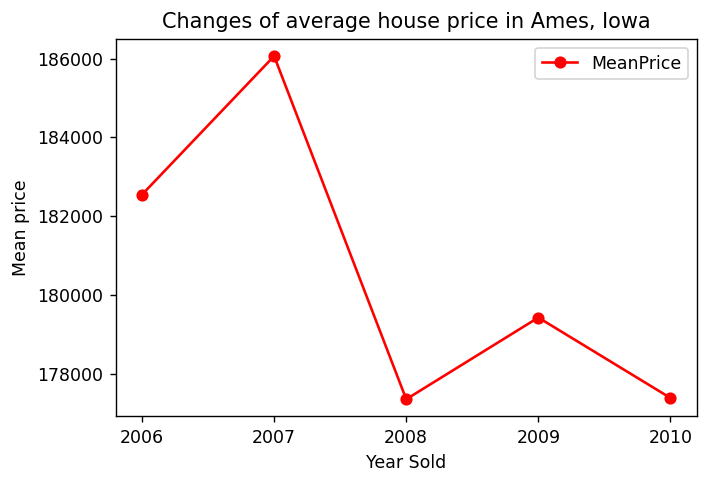

In [29]:
plt.rcParams['figure.dpi'] = 125
plot_df = mean_price_each_year.to_frame().reset_index().rename(columns={'SalePrice': 'MeanPrice'})
plot_df.plot.line(x='YrSold', y='MeanPrice',  marker='o', xlabel='Year Sold', ylabel='Mean price',\
                  title='Changes of average house price in Ames, Iowa',xticks=plot_df['YrSold'], color='red');

To explain the plungle in the average house price, we suppose that the remarkable changes during 2007-2008 can be explained by the economic recession of the US in 2008. This phenomenon leads to the significant increase of house price or  "real estate bubble" in US before imploding in 2008.

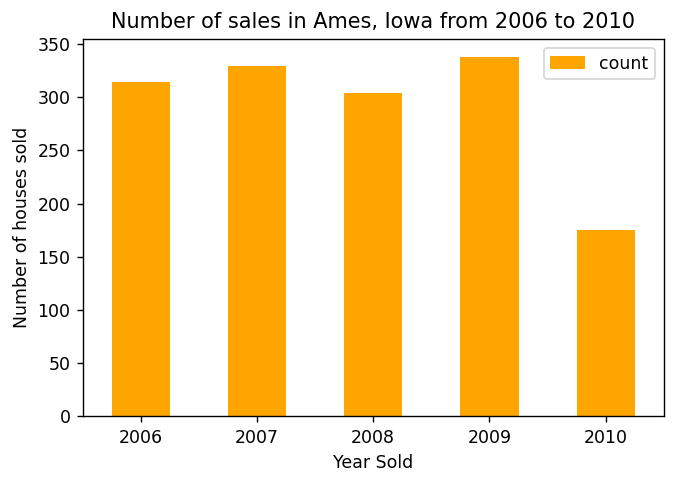

In [30]:
plot_df = houses_sold_each_year.to_frame().reset_index().rename(columns={'Id': 'count'})
plot_df.plot.bar(x='YrSold', y='count', xlabel='Year Sold', ylabel='Number of houses sold',\
                  title='Number of sales in Ames, Iowa from 2006 to 2010', rot=0, color='orange');

The graph illustrates the number of sales that occurred in each year. Because the dataset only goes up to June 2010, we could observe that the 2010 count is significantly low compared to previous years. Assuming that the number of sales in the first and second halves of the year is equal, the total sales in 2010 should be around 350. As a result, we could say that the housing market in Ames was neither growing nor shrinking between 2006 and 2010.

### Question 2: What are the popular neighborhoods?

- **Step 1:** Calculate the number of houses and the average house price in each neighborhood. Save the result in dataframe `locations_info`.

- **Step 2:** Draw the horizontal bar chart to show the preference ranks of neighborhoods and the box plot to assess the house price distribution in each area.

Step 1:

In [31]:
houses_per_location = new_df.groupby(['Neighborhood']).size().\
                        sort_values(ascending=True).reset_index().rename(columns={0:'count'})
mean_price_per_location = new_df.groupby(['Neighborhood'])['SalePrice'].mean().reset_index()
locations_info = pd.merge(houses_per_location, mean_price_per_location, on='Neighborhood')
locations_info.head()

,Neighborhood,count,SalePrice
0,Blueste,2,137500.000000
1,NPkVill,9,142694.444444
2,Veenker,11,238772.727273
3,BrDale,16,104493.750000
4,MeadowV,17,98576.470588


Step 2:

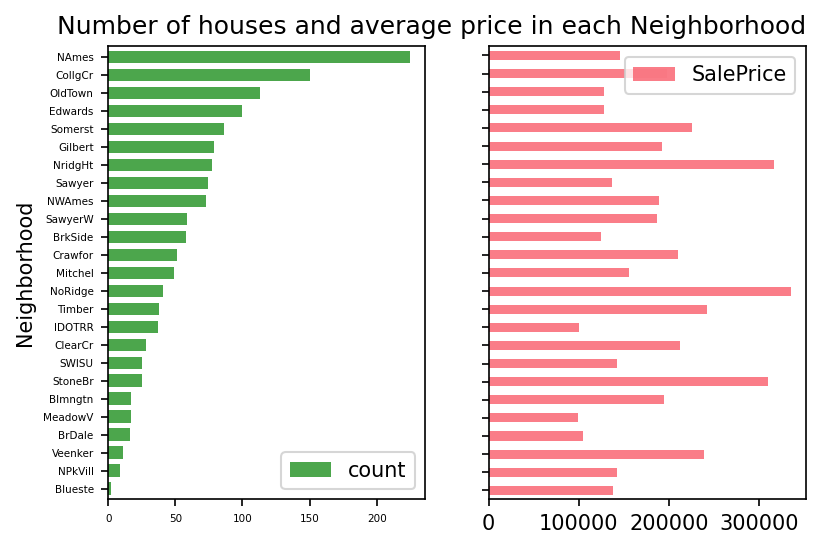

In [32]:
plt.rcParams['figure.dpi'] = 150
fig, axes = plt.subplots(nrows=1, ncols=2)
plot_df = locations_info
plt.title('Number of houses and average price in each Neighborhood', loc='right')
plot_df.plot.barh(x='Neighborhood', y='count', xlabel='Neighborhood',\
                  ylabel='count',alpha=0.7, width=0.7, sharey=True, ax=axes[0], fontsize=5, color='green');

plot_df.plot.barh(x='Neighborhood', y='SalePrice',\
                  xlabel='Neighborhood', ylabel='SalePrice', ax=axes[1], color='#f95d6a', alpha=0.8);

The left figure depicts sales statistics in each neighborhood, which we compare to the average house price to determine the target customer. We also noticed that location has a significant impact on house price, for example, the countryside **NAMES** has many reasonably priced houses, which explains why the average house price is not high.

### Question 3: How does the house purpose changes from 2006 to 2010?

- **Step 1:** Calculate the mean house price and sales each year for each house purpose.
- **Step 2:** Plot the bar chart showing the comparison among purposes and the remaining chart for the average prices.

Step 1:

In [33]:
houses_per_zone = new_df.groupby(['YrSold', 'MSZoning']).size()
houses_per_zone.head()

YrSold  MSZoning
2006    C (all)       2
        FV           13
        RH            3
        RL          246
        RM           50
dtype: int64

In [34]:
mean_price_per_zone = new_df.groupby(['YrSold','MSZoning'])['SalePrice'].mean()
mean_price_per_zone.head()

YrSold  MSZoning
2006    C (all)      71655.500000
        FV          186100.153846
        RH          128966.666667
        RL          194904.056911
        RM          128492.380000
Name: SalePrice, dtype: float64

Step 2:

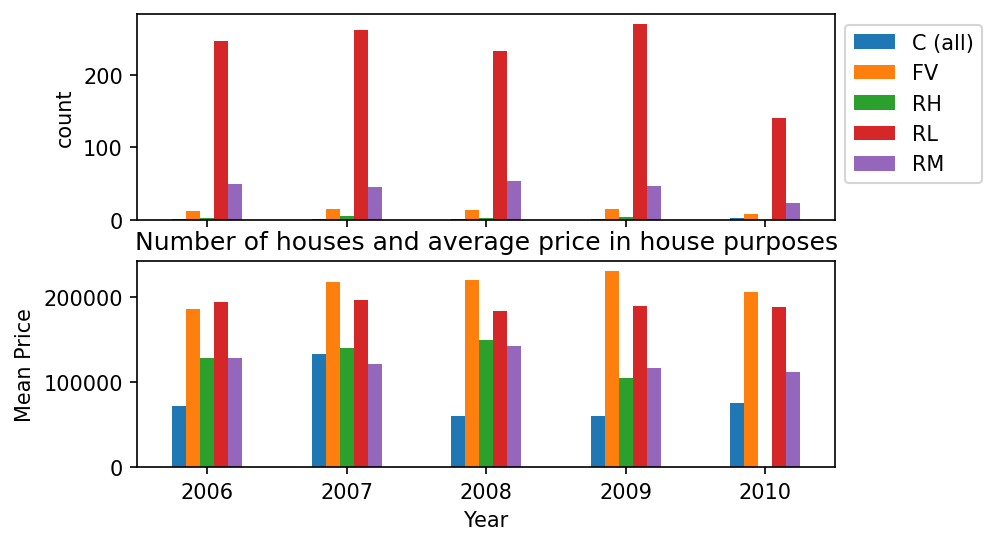

In [36]:
plt.rcParams['figure.dpi'] = 150
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.title('Number of houses and average price in house purposes')

# picture 1
plot_df = houses_per_zone.unstack().reset_index()
ax = plot_df.plot.bar(x = 'YrSold', y = ['C (all)', 'FV', 'RH', 'RL', 'RM'], rot=0, ax=axes[0], ylabel='count');
ax.legend(bbox_to_anchor=(1, 1))

# picture 2
plot_df = mean_price_per_zone.unstack().reset_index()
plot_df.plot.bar(x='YrSold',y = ['C (all)', 'FV', 'RH', 'RL', 'RM'], rot=0,\
                  sharex=True, xlabel='Year', ylabel='Mean Price', ax=axes[1], legend=False);

The top chart gives information about the number of houses sold for different purposes every year. The home buyer paid more attention to the Residential purpose, especially for Residential Low Density. Moreover, the figure for Residential Low Density purpose grew substantially and a similar trend was witnessed by the figure for Floating Village Residential and RM, while the opposite was true for the others.

Regrading to the remaining chart, the mean prices of Floating Village Residential and Residential Low Density purposes changed steadily, while the statistics for Commercial and other residential purposes witnessed a dive from 2008-2009. We suppose that the economic recession had a tremendous consequence on the house price in the densely populated area, while it had a marginal effect on the sparsely populated ones.

**Note:** The data in this competition are recorded up to 6/2010, thus the last year 2010 can be missing some values.

### Question 4:

---

## Expand Section

**Introduction about house prices problem.**
- write here

#### Preprocess data

In [415]:
#use log1p to SalePrice column to avoid inf values from log(0)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [416]:
Y_train = train_df['SalePrice']
#merge two table of the training and testing file to preprocess
all_data = pd.concat([train_df, test_df], axis = 0, sort = False)
all_data = all_data.drop(['Id', 'SalePrice'], axis = 1)

In [417]:
all_data.drop(dropped_cols.index, axis = 1, inplace = True)

In [418]:
all_data.isnull().sum().sort_values().tail()

Utilities       2
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
MSZoning        4
dtype: int64

In [419]:
numeric_missing_columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageArea', 'GarageCars']
for val in numeric_missing_columns:
    all_data[val] = all_data[val].fillna(0)
categorical_missing_columns = ['Exterior1st', 'Exterior2nd', 'SaleType', 'MSZoning', 'Electrical', 'KitchenQual']                   
for val in categorical_missing_columns:
    all_data[val] = all_data[val].fillna(all_data[val].mode()[0])

In [420]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')
#all values of Utilities column are the same, so we should delete it
all_data.drop(['Utilities'], axis=1, inplace=True) 
all_data.isnull().sum().max() #no more missing columns

0

In [421]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_features = all_data[numeric_features].apply(lambda x: skew(x)).sort_values()
#get all columns with skewness > 0.5 and make log transformation on them
col_skewness = skewed_features[abs(skewed_features) > 0.5]
col_skewness

YearBuilt        -0.599806
OverallCond       0.570312
BsmtFullBath      0.624832
HalfBath          0.694566
Fireplaces        0.733495
TotRmsAbvGrd      0.758367
2ndFlrSF          0.861675
BsmtUnfSF         0.919339
TotalBsmtSF       1.156894
GrLivArea         1.269358
MSSubClass        1.375457
BsmtFinSF1        1.425230
1stFlrSF          1.469604
WoodDeckSF        1.842433
OpenPorchSF       2.535114
BsmtHalfBath      3.931594
ScreenPorch       3.946694
EnclosedPorch     4.003891
BsmtFinSF2        4.146143
KitchenAbvGr      4.302254
3SsnPorch        11.376065
LowQualFinSF     12.088761
LotArea          12.822431
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

In [424]:
for val in col_skewness.index:
    all_data[val] = np.log1p(all_data[val])    

In [425]:
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']
all_data['TotalSF'] = all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['TotalBsmtSF']
all_data['Total_Bathrooms'] = all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath'])
all_data['Total_porch_sf'] = all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF']
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [426]:
#convert categorical variable into dummy variables
all_data = pd.get_dummies(all_data) 
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_Square_Feet,Total_Bath,YrBltAndRemod,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.631370,2.306780,7,1.026672,2.152099,2003,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,0.0,2.133555,0.526589,0.000000,2,0.526589,3,0.526589,1.162283,0.000000,2.0,548.0,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.0,2,2008,3272.0,3.5,2005.152099,8.167115,2.789884,1.634547,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [427]:
X_train = all_data[:len(Y_train)]
X_test = all_data[len(Y_train):]
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (1460, 229)
Test size:  (1459, 229)


In [435]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=[14.5], cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=[0.0007], random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', 
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)       
lightgbm = LGBMRegressor(objective='regression', num_leaves=4, learning_rate=0.01, n_estimators=5000,
                        max_bin=200, bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
                        feature_fraction=0.2, feature_fraction_seed=7, verbose=-1)
xgboost = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
                            min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571,
                            subsample=0.5213, random_state =7, nthread = -1, objective ='reg:squarederror')
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost, random_state=100, use_features_in_secondary=True, n_jobs=-1)
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(Y_train))
print('Stack_gen score:', stack_gen_model.score(np.array(X_train), np.array(Y_train)))
elastic_model_full_data = elasticnet.fit(X_train, Y_train)
print('Elasticnet score:', elastic_model_full_data.score(X_train, Y_train))
lasso_model_full_data = lasso.fit(X_train, Y_train)
print('Lasso score:', lasso_model_full_data.score(X_train, Y_train))
ridge_model_full_data = ridge.fit(X_train, Y_train)
print('Ridge score:', ridge_model_full_data.score(X_train, Y_train))
svr_model_full_data = svr.fit(X_train, Y_train)
print('Svr score:', svr_model_full_data.score(X_train, Y_train))
gbr_model_full_data = gbr.fit(X_train, Y_train)
print('GradientBoosting score:', gbr_model_full_data.score(X_train, Y_train))
xgb_model_full_data = xgboost.fit(X_train, Y_train)
print('Xgboost score:', xgb_model_full_data.score(X_train, Y_train))
lgb_model_full_data = lightgbm.fit(X_train, Y_train)
print('Lightgbm score:', lgb_model_full_data.score(X_train, Y_train))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Stack_gen score: 0.9704041024850222
Elasticnet score: 0.9293879257920585
Lasso score: 0.9200831234691412
Ridge score: 0.9235710407194474
Svr score: 0.9134268003439208
GradientBoosting score: 0.9808541411412293
Xgboost score: 0.9603453028574912
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Lightgbm score: 0.9581323849916513


In [436]:
def blending_models(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.2 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))
y_predict = np.floor(np.expm1(blending_models(X_test)))
y_predict

array([121829., 162533., 181032., ..., 163352., 118258., 219639.])

---

### Commit our predictions

In [437]:
submission_file = pd.DataFrame({'Id':test_df['Id'], 'SalePrice':y_predict})
submission_file.to_csv('submission.csv', index=False)

**Kaggle** **score:** &ensp; <ins>0.11736</ins>

**Position:** &ensp;&ensp; &ensp; &ensp; <ins>128</ins>

---

## References

[1] Dean De Cock. (2016&asp; 08). *House Prices - Advanced Regression Techniques*. Kaggle. Retrieved January 01, 2022 from https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

[2]	ProgramerSought team. *Python machine learning combat: master these four feature selection methods to improve model prediction performance*. ProgramerSought. Retrieved January 05, 2022 from https://programmersought.com/article/16587300186/

[3] Ying Geng(June 7, 2020).*House Price Analysis of Ames, Iowa (2006–2010)*. Medium. Retrieved January 07, 2022 from https://medium.com/@ying.geng5/house-price-analysis-of-ames-iowa-2006-2010-266e307f836f

---